# Crowd navigation evaluation

Subfolders:
mds/ rds/ shared_control/

In [19]:
import math
import collections
import urllib.request
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

import sys, os, fnmatch
# Importing Metrics Functions:
# sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'qolo'))

# from metrics_evaluation import crowd_evaluation
from crowd_evaluation import *
from crowdbot_data import AllFrames

%matplotlib inline

#os.listdir()
# print(os.pardir)
main_dir = os.path.join(os.path.dirname(sys.path[0]), os.pardir)
# print(main_dir)

data_dir = os.path.join(main_dir,'data-crowdbot/')
control_type = ['rds/', 'shared_control/','mds/']

data_type = ['metrics/', 'pose_stamped', 'source_data']

# Testing directories:
fullPath = data_dir+control_type[2]+data_type[0]
print(fullPath)

mds_files = fnmatch.filter(os.listdir(path=fullPath), "*.npy")

print(mds_files)

/Users/diego/Documents/qolo_software/crowdbot-evaluation-tools/../data-crowdbot/mds/metrics/
['2021-04-24-11-20-18_crowd_eval.npy', 'nocam_2021-04-24-11-48-21_crowd_eval.npy', '2021-04-24-11-48-21_crowd_eval.npy', '2021-04-24-11-35-54_crowd_eval.npy', '2021-04-24-11-55-30_crowd_eval.npy', '2021-04-24-11-23-43_crowd_eval.npy', '2021-04-24-11-43-54_crowd_eval.npy', '2021-04-24-11-40-33_crowd_eval.npy']


In [30]:
mds_tests = list()
rds_tests = list()
sh_tests = list()

rds_path = data_dir+control_type[0]+data_type[0]
rds_files = fnmatch.filter(os.listdir(path=rds_path), "*.npy")

shared_control_path = data_dir+control_type[1]+data_type[0]
shared_control_files = fnmatch.filter(os.listdir(path=shared_control_path), "*.npy")

mds_path = data_dir+control_type[2]+data_type[0]
mds_files = fnmatch.filter(os.listdir(path=mds_path), "*.npy")

print(rds_files[0])
rds_test = dict()
rds_test = np.load(rds_path+rds_files[0], allow_pickle=True).item()
rds_test['crowd_density10']

# TODO-1: Read the qolo_eval files and extract controller metrics

# print(rds_test['path_length2goal'])

2021-04-24-11-20-18_crowd_eval.npy
[0.10185917 0.11459156 0.11777466 ... 0.07321128 0.07957747 0.07957747]


## Crowd 
1. Crowd Density (within an area of 10m around the robot):
evalMetricCrowdDensity(npy_files_directory, plot_result=False)
2. Minimal distance to pedestrians: mean+SD: 
evalMetricProximity(npy_files_directory, plot_result=False):

2. Normalized proximity to surrounding pedestrians : SD(d1..dn) / avg(d1...dn)



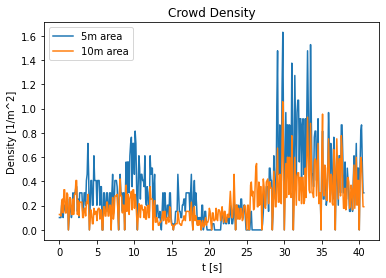

In [ ]:
plot_results = True
flag_tracker = False

test_dir = rds_tests[0]
density_detect = evalMetricCrowdDensity(test_dir,False,plot_results)

# density_track = evalMetricCrowdDensity(test_dir,True,plot_results)

min_dist = evalMetricProximity(test_dir, plot_results)

## Path Efficiency 
1. Relative time to goal (normalized by the goal distance)
2. Relative path length (normalized by the goal distance in straight line): 
evalMetricsPathAndTimeToGoal(npy_files_directory, plot_result=False):

3. Relative Jerk (smoothness of the path as added sum of linear and angular jerk): 


In [ ]:
plot_results = True
# path_length_to_goal, time_duration_to_goal, min_dist (to the Attractor)
evalMetricsPathAndTimeToGoal(test_dir, plot_results)

## Shared Control 
1. Agreement
2. Fluency
3. Entropy

shared_control(npy_files_directory, plot_result=False)

In [ ]:
# metrics['fluency']['mean'] = 

fluency, linear_dis, heading_dis, disagreement = MetricsSharedControl(test_dir, plot_results)
print(linear_dis)
print(heading_dis)

